|x| = 64.50,	|Ax-b|/|b| = 0.0351,	iter = 23,	shift = 2.00

|x| = 64.50,	|Ax-b|/|b| = 0.0351,	iter = 23,	shift = 2.00

|x| = 64.50,	|Ax-b|/|b| = 0.0351,	iter = 23,	shift = 2.00

|x| = 64.50,	|Ax-b|/|b| = 0.0351,	iter = 23,	shift = 2.00

|x| = 64.50,	|Ax-b|/|b| = 0.0351,	iter = 23,	shift = 2.00

|x| = 64.50,	|Ax-b|/|b| = 0.0351,	iter = 23,	shift = 2.00



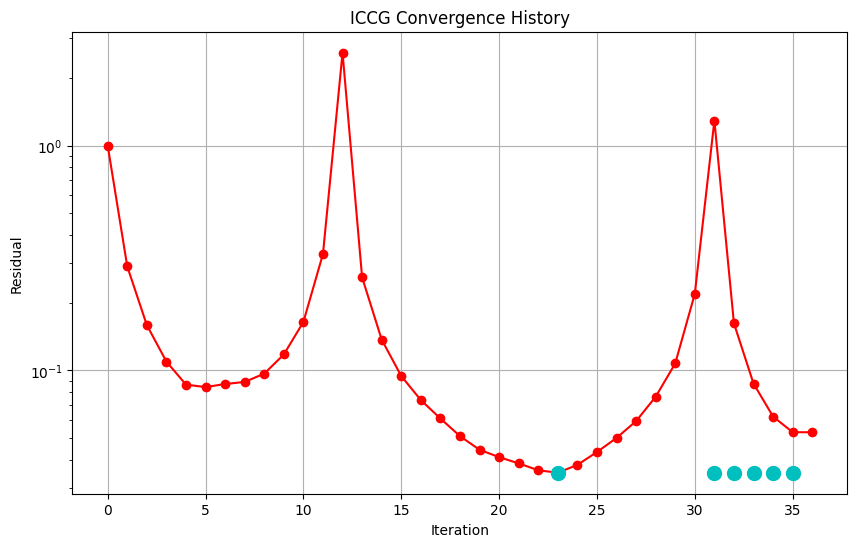

In [1]:
import os, sys
import numpy as np
import scipy.sparse as sp
import scipy.io
import matplotlib.pyplot as plt
import time
sys.path.append(r'C:\EMSolution\EMSolPy5\EMPY_Analysis\bin\Release') 
import EMPY_Solver

mat_data = scipy.io.loadmat(f'A_b.mat', squeeze_me=True)
A = mat_data['A'].tocoo()
b = mat_data['b']
rows = A.col
cols = A.row
vals = A.data
N = A.shape[0]

tol = 1e-6
shift = 2.0
scaling = 0
diverge_factor = 1.2
diverge_count = 10

b = np.ones(N)
x = b.copy()
solver = EMPY_Solver.EMPY_Solver();
solver.SetMatrix(N, len(rows), rows, cols, vals)
solver.SetScaling(scaling)
solver.SetEps(tol);
solver.SetShiftParameter(shift);
solver.SetDivCriterion(diverge_factor, diverge_count)

start_time = time.time()
solver.Solve(b, x)
x = solver.GetResult()
elapsed_time = time.time() - start_time

shift_used = solver.GetShiftParameter()
iter_best = solver.GetMinimumResidual() 
residual_log = solver.GetResidualLog()

x = np.array(x)
Ax_b = A.dot(x) - b
relative_residual = np.linalg.norm(Ax_b) / np.linalg.norm(b)

print(f"|x| = {np.linalg.norm(x):.2f},\t|Ax-b|/|b| = {relative_residual:.3g},\t" f"iter = {iter_best},\tshift = {shift_used:.2f}\n")
	
plt.figure(figsize=(10, 6))
plt.semilogy(residual_log, 'r.-', markersize=12)
plt.semilogy(iter_best, residual_log[iter_best], 'c.', markersize=20)
#plt.semilogy(iter_best, relative_residual, 'c.', markersize=20)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('ICCG Convergence History')
plt.grid(True)

for diverge_count in range(6,11):
	solver.SetDivCriterion(diverge_factor, diverge_count)
	solver.Solve(b, x)
	x = solver.GetResult()
	x = np.array(x)
	Ax_b = A.dot(x) - b
	iter_best = solver.GetMinimumResidual() 
	relative_residual = np.linalg.norm(Ax_b) / np.linalg.norm(b)
	plt.semilogy(iter_best+diverge_count+2, relative_residual, 'c.', markersize=20)
	print(f"|x| = {np.linalg.norm(x):.2f},\t|Ax-b|/|b| = {relative_residual:.3g},\t" f"iter = {iter_best},\tshift = {shift_used:.2f}\n")

plt.savefig('test.png')
os.startfile('test.png')